In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import PCA
from sklearn.decomposition import PCA

## 1. Dehalogenases - small set 

In [3]:
deepfri_output = "/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/Metagenomic-DeepFRI/../mDeepFRI_test/test_output_2/results.tsv"
metadata = "/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/Metagenomic-DeepFRI/notebooks/data/248_HAD_dehalogenase_subset.csv"

In [4]:
df = pd.read_csv(deepfri_output, sep='\t')
metadata_df = pd.read_csv(metadata, sep=',')

In [47]:
mode = "mf"

molecular_function = df.query(f"DeepFRI_mode =='{mode}'")
feature_table = pd.pivot_table(molecular_function, index="Protein", columns="GO_term/EC_number", values="Score").fillna(0)

labels = metadata_df.is_defluorinating
feature_table.index = feature_table.index.str.replace("seq_", "")
# convert to int
feature_table.index = feature_table.index.astype(int) - 1
feature_table = feature_table.sort_index()

In [48]:
top_annotations = molecular_function.Annotation.value_counts().index[:10]
# show only top annotations
molecular_function.query(f"Annotation in @top_annotations")["GO_term/EC_number"].value_counts()

GO_term/EC_number
GO:0016788    15
GO:0016853    13
GO:0000287    11
GO:0042578    11
GO:0016765    10
GO:0016791     9
GO:0003677     7
GO:0016829     6
GO:0046914     6
GO:0140096     5
Name: count, dtype: int64

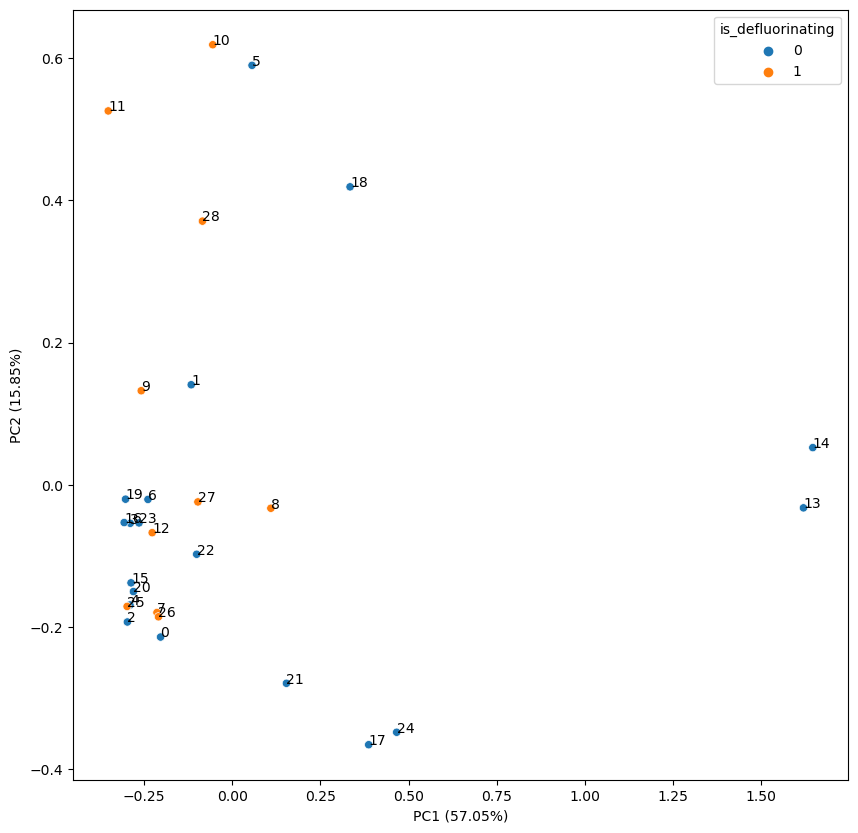

In [49]:
# make a PCA and plot a feature table
pca = PCA(n_components=2)
pca.fit(feature_table)
X_pca = pca.transform(feature_table)

labels = labels[feature_table.index]

# plot the PCA and color by labels
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels)

# add variance to axes
plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)")
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)")

# add numbers over dots
for i, txt in enumerate(feature_table.index):
    plt.text(X_pca[i, 0], X_pca[i, 1], txt)

plt.show()

In [52]:
# fit the search
search.best_estimator_.fit(feature_table, labels)

RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=200)

In [60]:
start_dataset = "/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/Metagenomic-DeepFRI/notebooks/data/halogenases_start_dataset/results.tsv"
start_df = pd.read_csv(start_dataset, sep='\t')
start_meta = "/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/Metagenomic-DeepFRI/notebooks/data/248_HAD_start_dataset_fixed.csv"
start_meta_df = pd.read_csv(start_meta, sep=',')

In [73]:
# select the mode
mode = "mf"
start_molecular_function = start_df.query(f"DeepFRI_mode =='{mode}'")
# convert dataset to matrix
start_feature_table = pd.pivot_table(start_molecular_function, index="Protein", columns="GO_term/EC_number", values="Score").fillna(0)

In [77]:
# unify two datasets and then split again

full = pd.concat([feature_table, start_feature_table], axis=0).fillna(0)

<Figure size 300x300 with 0 Axes>

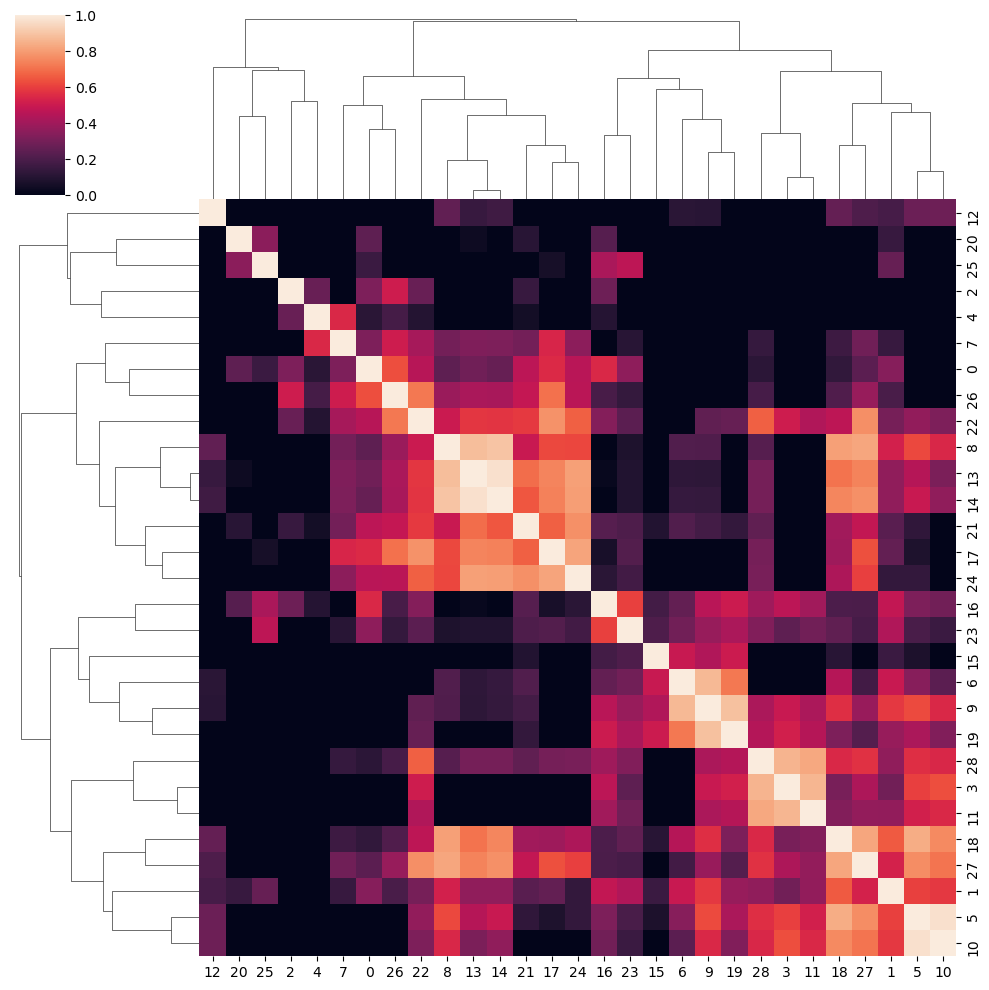

In [113]:
# calculate cosine distances
from sklearn.metrics import pairwise_distances

cosine_distances = pairwise_distances(full, metric="cosine")
# transform to similarity
cosine_similarity = 1 - cosine_distances

# order and plot heatmap
plt.figure(figsize=(3, 3))
sns.clustermap(cosine_similarity[:29, :29])
plt.show();

/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/conda-envs/data-analysis/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/conda-envs/data-analysis/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 300x300 with 0 Axes>

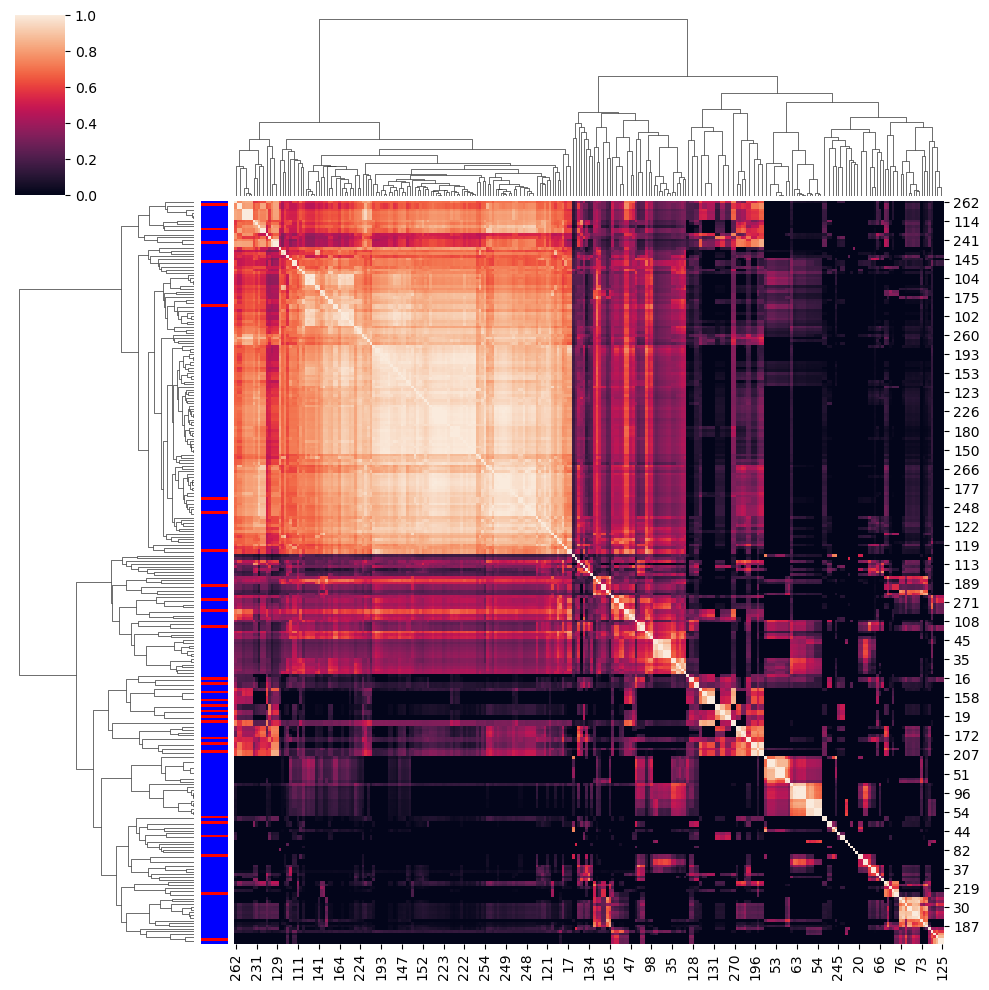

In [117]:
# calculate cosine distances
from sklearn.metrics import pairwise_distances

cosine_distances = pairwise_distances(full, metric="cosine")
# transform to similarity
cosine_similarity = 1 - cosine_distances

# order and plot heatmap
plt.figure(figsize=(3, 3))
# color first 29 entries as red, and rest as blue
sns.clustermap(cosine_similarity, row_colors=[["red"]*29 + ["blue"]*244])
plt.show();